In [54]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
# import pypokedex
import pokebase as pb
import glob
import re

ModuleNotFoundError: No module named 'natsort'

In [38]:
pokemon = pb.pokemon(4)
len(pokemon.types)

1

In [51]:
# Load all the files relevant for the project
image_folder = '../datasets/raw/renders_2d/images'
metadata = pd.read_csv('../datasets/raw/renders_3d/pokemon.csv')
image_paths = sorted(glob.glob(f'{image_folder}/*.png'), )

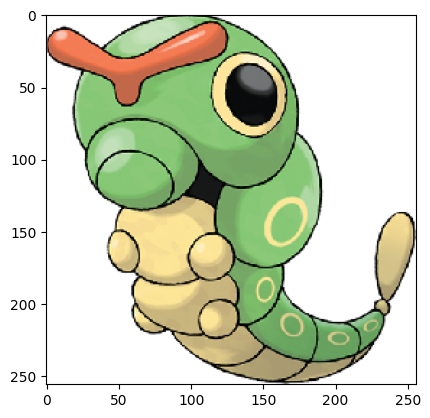

In [53]:
# Display the first image
img = mpimg.imread(image_paths[1])
imgplot = plt.imshow(img)

In [23]:
a,b = [1,2]
b

2

In [58]:
image_paths_temp = ["../datasets/raw/renders_2d/images/29.png", "../datasets/raw/renders_2d/images/678f"]

In [60]:
# Pair the images with the metadata
names, images, type1, type2, dex = [], [], [], [], []
for image in image_paths:
    img = image
    image = image.split('/')[-1].split('.')[0]
    if '-' in image:
        image, suffix  = image.split('-', maxsplit=1)
    elif "f" in image:
        image, suffix = image[:3], "female"
    else:
        suffix = None
    
    pokemon_species = pb.pokemon_species(int(image))
    pokemon_name = pokemon_species.name + '-' + suffix if suffix else pokemon_species.name
    names.append(pokemon_name)
    print(img, pokemon_name)
    pokemon = pb.pokemon(pokemon_name)
    images.append(img)
    ptype = pokemon.types
    if len(ptype) > 1:
        type1.append(ptype[0].type.name)
        type2.append(ptype[1].type.name)
    else:
        type1.append(ptype[0].type.name)
        type2.append('')
    dex.append(pokemon_species.id)

../datasets/raw/renders_2d/images/1.png bulbasaur
../datasets/raw/renders_2d/images/10.png caterpie


KeyboardInterrupt: 

In [62]:
df = pd.DataFrame({'name': names, 'image': images, 'type1': type1, 'type2': type2, 'dex': dex})
df.sort_values(by='dex', inplace=True);df.reset_index(drop=True, inplace=True)

In [65]:
df.to_csv('../datasets/processed/pokemon.csv', index=False)